In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("reduced_health_Survey_GW.csv")
df.head()

,case_id,state,region,emply,hhcomp,age,age2,educ,income,race,...,heal27e,heal27f,heal27g,heal28,heal29,heal30,heal31,heal33g,heal34,bmi
0,10000021,NaN,South,Retired,Two,64,NaN,Technical school/other,"$15,000 but less than $25,000",Black Non-Hispanic,...,No,No,No,Yes,Community clinic or health center,Yes,Good,No,NaN,28.1
1,10000031,NaN,South,Full-time,One,52,NaN,Some college,"$100,000 and over (Unspecified)",White Hispanic,...,No,No,Yes,Yes,Doctor's office or HMO,No,NaN,No,NaN,48.7
2,10000032,NaN,West,Retired,One,66,NaN,High school graduate,"Less than $15,000",White Hispanic,...,No,No,No,Yes,Doctor's office or HMO,No,NaN,No,NaN,25.5
3,10000034,NaN,North East,Part-time,Refused,18,NaN,Less than high school graduate,"Less than $15,000",Black Non-Hispanic,...,No,No,No,Yes,Doctor's office or HMO,Yes,Excellent,Yes,NaN,20.5
4,10000039,NaN,South,Full-time,Three,48,NaN,Some college,"$50,000 but less than $75,000",Black Hispanic,...,No,No,Yes,Yes,Doctor's office or HMO,Yes,Good,No,NaN,99.9


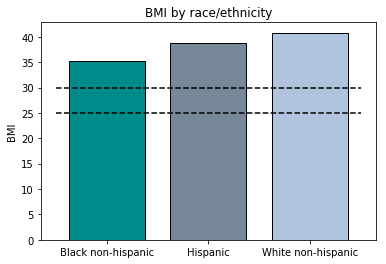

In [37]:
# BMI by race
bmi_race = df["bmi"].groupby(df["healask"]).mean().to_frame().reset_index()

colors = ["darkcyan", "lightslategray", "lightsteelblue"]

fig, ax = plt.subplots()
plt.bar(range(3), bmi_race["bmi"], width = .75,
       edgecolor = "black", color = colors)
plt.ylabel("BMI")
plt.title("BMI by race/ethnicity")
ax.plot([-.5,2.5], [25,25], "k--")
ax.plot([-.5,2.5], [30,30], "k--")
plt.xticks(np.arange(3), bmi_race["healask"].unique())
plt.show()

In [ ]:
# Percent with each chronic disease
df.rename(columns = {
    "heal26": "diabetes",
    "heal27a": "hi_BP",
    "heal27b": "hi_chol",
    "heal27c": "lung_prob",
    "heal27d": "ment_health",
    "heal27e": "heart_disease"
}, inplace = True)